<a href="https://colab.research.google.com/github/Chaudhari-Amar/econ8320-assignment-12/blob/main/Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing


## Defining Natural Language Processing

As we continue further into our content this semester, you have probably noticed that each tool takes us to a new level of being able to conduct analysis with less code. As we progress, we move toward what are called "higher level" programming tools. Python itself is a high-level programming language, meaning that it is written in a way that is easier for humans to read than computers, with lots of translation happening behind the scenes.

Tools like `pandas` remove a lot of the manual work from data processing. `numpy` and `scipy` handle much of the mathematical and statistical work that we want to do with our data. Natural Language Processing (NLP) is a tool similar to regex, but allowing us to take our text analytics to entirely new levels.

Where regex allows us to look for text-based patterns in our words or string content, we want to go further. We want to look for **meaning**-based content. How do I find content that reflects anger? What words are most common in those contexts? What about when the content reflects joy? Sadness? Regex is not enough in these cases, and so we build to an even more powerful tool.

NLP is a broad set of tools designed in order to enable users to work with text in ways that a human might work with text. When we work with text, we look for structures like sentences, and within those sentences we look for nouns to tell us who or what is the focus of the content. We look for verbs to understand what is happening. Adjectives and other descriptors help us to better understand the nuances of context. NLP models are trained to recognize these elements in text, and to be able to leverage that content to break text down and provide human users valuable information at a larger scale than would be possible if the document were simply read (slowly) by a human.

| Regex | NLP |
| --- | --- |
| Create patterns to match in text | Identify the structure of text and use that to refine information|
| Used to verify or find data | Used to analyze data |
| Applies user-defined rules | Relies heavily on ML-based (or other) models |


## What NLP can do

So what can NLP do for us?

### Identify parts of speech

When we pass a document (really a string, but typically we provide a fairly large string to an NLP algorithm) to an NLP model, it is able to identify parts of speech (nouns, verbs, etc.). This enables us to quickly break down our text to find various kinds of keywords, and is the first step in many more complex pipelines.

### Iterate over sentences

NLP can identify sentences within a document. This makes for a powerful iterative tool, as we will be able to define a processing pipeline for each sentence, and then apply that pipeline to as many sentences as exist within our document, without having to write complex code to try and recognize where each sentence starts and ends (this is MUCH harder than it sounds).

### Find words used to describe various nouns (or anything else!)

Beyond simply identifying parts of speech, NLP models can be used to build a structural dependency tree of each sentence. This structure allows us to associate adjectives with their respective nouns, or adverbs to the verb that they modify. We can explore how various entities are described in our document based on word associations. We can even visualize the structure of the sentence using simple mapping functions.

### Filter text for analysis

We can use NLP to filter our text. We can look for sentences about a specific entity, or explore other ways of filtering our text in order to create a better understanding of overall patterns in the document.

### Conduct sentiment analysis

One of the most powerful capabilities resulting from NLP models is the ability to analyze sentiment within the text. Words have the ability to convey literal meanings, as well as the more subtle capacity to convey emotion. By looking for word combinations in our text, NLP models can provide sentiment measurements at the word, sentence, or document level. This provides the ability to sort through texts for specific sentiments to learn about the way in which emotion affects the outcomes we are examining in text. One example might be looking through descriptions for negative emotions, and being able to respond to unhappy customers by flagging negative descriptions.


## Implementing NLP models

To get started with NLP models, we need to install the right libraries (and a corpus!). The library that we will use is `spacy`, although there are multiple other options available to us. One other common NLP library is `nltk`, the Natural Language Toolkit (NLTK). In my experience NLTK is more commonly employed when someone wants to create their own model from scratch, rather than implement pre-built and optimized NLP models.

In addition to a library to conduct NLP, we also rely on a **corpus**. A corpus is essentially a model of a specific language that is built to enable the actual analysis. `spacy` as a library is a general structure that can be implemented on ANY language. The corpus allows us to select a specific language, and a model of that language built on a specific set of information.

When we install `spacy`, we will also download the `en_core_web_sm` corpus. This corpus is a small-sized model of the english language, and was trained on web-based data. That means that it will perform best on data drawn from websites, and is not as strong a model for other contexts (like analyzing Pride and Prejudice). That doesn't mean that we can't use in other contexts, but it does suggest that results will not be as refined or accurate.

We need to get ourselves some text to analyze before we jump into the NLP world. In true form, here is another favorite old book. We will take a look at the first three chapters of Jane Eyre from [Project Gutenberg](https://www.gutenberg.org/browse/scores/top).

In [ ]:
import requests

jane = requests.get(
"https://github.com/dustywhite7/Econ8320/raw/master/AssignmentData/janeEyreCh1to3.txt"
).text

You can take a look at the text to get an idea of what we will be working with. Once you're ready, we will go ahead and import the `spacy` library. The very first thing we do once we import `spacy` is to load the coprus, so that we are able to use its language models to parse our document. Let's run the code, and then discuss what is happening.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(jane)

### The structure of a parsed document

When we create an `nlp` object based on our corpus, we are creating our pipeline for working with text. Our corpus contains all of the information necessary to prepare our data for analysis. When we create our `doc` object, we are passing our document through the processing pipeline. Our new parsed document (`doc` in this case), has some important **attributes**:

- `sents` - a generator function to iterate over each sentence in the document
- `token` - each individual element of the document
    - Elements exist at the word/punctuation level

After being processed, our document has been broken down into tokens, and then (to some extent) reconstructed into sentences. Additionally, each token is mapped out in relation to the other tokens within a sentence, and is described using various attributes to inform how that token relates to the text around it.

In [ ]:
test = [i.text.replace('\n', ' ') for i in doc.sents][:10]
# print first 10 sentences, replacing newlines with spaces

test


['CHAPTER I   There was no possibility of taking a walk that day.',
 'We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds so sombre, and a rain so penetrating, that further outdoor exercise was now out of the question.  ',
 'I was glad of it: I never liked long walks, especially on chilly afternoons: dreadful to me was the coming home in the raw twilight, with nipped fingers and toes, and a heart saddened by the chidings of Bessie, the nurse, and humbled by the consciousness of my physical inferiority to Eliza, John, and Georgiana Reed.  ',
 'The said Eliza, John, and Georgiana were now clustered round their mama in the drawing-room: she lay reclined on a sofa by the fireside, and with her darlings about her (for the time neither quarrelling nor crying) looked perfectly happy.',
 'Me, she had dispensed from joining the group; saying, “She reg

### Understanding tokens

Recall that each word is represented as a token in the processed document. These tokens are immensely powerful. They are the word, but also more than that. Words in the English language are often modified based on context. Verbs are conjugated, nouns may be plural, among many possibilities. Each word is **tokenized** through our corpus in order to identify the underlying word.

This is important, because we might want to look for each instance of a single word in our corpus. Let's say that we want to find every instance of "eat". If we look for "eat", we want to make sure that "eats" and "ate", as well as "eating" and other forms are all considered. This is where tokenization becomes critical. Each token contains the text value from the original document, but also the **lemmatized** word. The lemma is the base form of the word, allowing us to search for lemmas rather than the text word. This streamlines our ability to analyze text by focusing on lemmas rather than unprocessed text.

Other valuable attributes are also associated with our tokens:
- `lemma_` - the "root word" from which a token/word is derived
- `pos_` - the part of speech of a token/word
- `dep_` - the relationship of dependent tokens to the parent token (adjectives to nouns, etc.)
- `like_email`/`like_num`/`like_url` - check if a token is like an email, number, or url (unlikely in Jane Eyre)

Let's look at the first 100 non-space, non-punctuation lemmas in Jane Eyre:

In [ ]:
lemmas100 = [(i.lemma_, i.text) for i in doc if (not i.is_punct) and (not i.is_space)][:100]

print(lemmas100) # The lemma comes first, followed by the actual word in the text.

[('chapter', 'CHAPTER'), ('I', 'I'), ('there', 'There'), ('be', 'was'), ('no', 'no'), ('possibility', 'possibility'), ('of', 'of'), ('take', 'taking'), ('a', 'a'), ('walk', 'walk'), ('that', 'that'), ('day', 'day'), ('we', 'We'), ('have', 'had'), ('be', 'been'), ('wandering', 'wandering'), ('indeed', 'indeed'), ('in', 'in'), ('the', 'the'), ('leafless', 'leafless'), ('shrubbery', 'shrubbery'), ('an', 'an'), ('hour', 'hour'), ('in', 'in'), ('the', 'the'), ('morning', 'morning'), ('but', 'but'), ('since', 'since'), ('dinner', 'dinner'), ('Mrs.', 'Mrs.'), ('Reed', 'Reed'), ('when', 'when'), ('there', 'there'), ('be', 'was'), ('no', 'no'), ('company', 'company'), ('dine', 'dined'), ('early', 'early'), ('the', 'the'), ('cold', 'cold'), ('winter', 'winter'), ('wind', 'wind'), ('have', 'had'), ('bring', 'brought'), ('with', 'with'), ('it', 'it'), ('cloud', 'clouds'), ('so', 'so'), ('sombre', 'sombre'), ('and', 'and'), ('a', 'a'), ('rain', 'rain'), ('so', 'so'), ('penetrate', 'penetrating'), (

We can also filter words by part of speech using the `pos_` attribute of our tokens. Let's look for the first 100 nouns in the text.

In [ ]:
nouns = [i.text for i in doc if i.pos_=='NOUN'][:100]

print(nouns) # The lemma comes first, followed by the actual word in the text.

['CHAPTER', 'possibility', 'walk', 'day', 'leafless', 'shrubbery', 'hour', 'morning', 'dinner', 'company', 'winter', 'wind', 'clouds', 'rain', 'exercise', 'question', 'walks', 'afternoons', 'home', 'twilight', 'fingers', 'toes', 'heart', 'chidings', 'nurse', 'consciousness', 'inferiority', 'mama', 'drawing', 'room', 'sofa', 'fireside', 'darlings', 'time', 'crying', 'group', 'necessity', 'distance', 'observation', 'earnest', 'disposition', 'manner', 'franker', 'privileges', 'children', 'cavillers', 'questioners', 'child', 'elders', 'manner', 'breakfast', 'room', 'drawing', 'room', 'bookcase', 'volume', 'care', 'pictures', 'window', 'seat', 'feet', 'moreen', 'curtain', 'retirement', 'Folds', 'drapery', 'view', 'hand', 'left', 'panes', 'glass', 'day', 'intervals', 'leaves', 'book', 'aspect', 'winter', 'afternoon', 'blank', 'mist', 'cloud', 'scene', 'lawn', 'storm', 'shrub', 'rain', 'blast', 'book', 'History', 'letterpress', 'pages', 'child', 'blank', 'haunts', 'sea', 'fowl', 'rocks', 'pro

Pretty cool! If you look through that list, you'll see that there are a lot of different kinds of nouns. Two that stood out to me are "drawing" and "room"... oh wait... that's ONE NOUN that is two words! And leads us right into **noun chunks**. ;)

Sometimes, you want to be able to see a "complete" noun, and noun chunks are the tool to use!

In [ ]:
nouns = [i.text.replace('\n', ' ') for i in doc.noun_chunks][:100] # getting rid of new lines in our noun chunks

print(nouns)

['I', 'no possibility', 'a walk', 'We', 'the leafless shrubbery', 'the morning', 'dinner', 'Mrs. Reed', 'no company', 'the cold winter wind', 'it', 'clouds', 'further outdoor exercise', 'the question', 'I', 'it', 'I', 'long walks', 'chilly afternoons', 'me', 'the coming home', 'the raw twilight', 'nipped fingers', 'toes', 'a heart', 'the chidings', 'Bessie', 'the nurse', 'the consciousness', 'my physical inferiority', 'Eliza', 'John', 'Georgiana Reed', 'The', 'Eliza', 'John', 'Georgiana', 'their mama', 'the drawing-room', 'she', 'a sofa', 'the fireside', 'her darlings', 'her', 'the time', 'crying', 'Me', 'she', 'the group', 'She', 'the necessity', 'me', 'a distance', 'she', 'Bessie', 'her own observation', 'I', 'good earnest', 'a more sociable and childlike disposition', 'something', 'franker', 'it', 'she', 'me', 'privileges', 'contented, happy, little children', 'Bessie', 'I', 'I', 'Jane', 'I', 'cavillers', 'questioners', 'something', 'a child', 'her elders', 'that manner', 'you', 'A 

That's better. Noun chunks include all of the modifiers for a given noun, and make it easier to build a more complete understanding of the references being made. Why do we care? Because "the red moreen curtain" is the object, and we want to be sure to understand the implication of the full object, rather than only the word within the noun chunk that is actually a noun.

If we want to understand more about the nature of the relationships between words within a sentence, we can plot a dependency tree.

**NOTE: When you run the following code, be sure to click the STOP button when you're done, or no other code will run! The renderer for the dependency tree will keep running until you terminate it!**

In [ ]:
from spacy import displacy

sent = [i for i in doc.sents][100]
displacy.serve(sent, style="dep")

/home/codio/miniconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Using this mapping, we can see each of the clauses of the sentence, and how words within the sentence relate to one another. The mapping can help us to understand whether or not we have correctly identified parts of speech that are associated with the topics we are trying to uncover in our code.


## Sentiment Analysis

My personal favorite part of NLP, sentiment analysis is a very powerful instrument for understanding text and creating actionable items. Many firms use sentiment analysis in combination with their social media accounts to measure engagement and understand how successful marketing campaigns or other interactions are with target audiences.

In order to conduct sentiment analysis using spacy, we are going to use a library called `spacytextblob`. This library includes supplemental material that expands the english corpus' ability to process our data. When utilized, `spacytextblob` is going to add sentiment analysis models to the general pipeline created through `spacy`.

We can incorporate the `SpacyTextBlob` process into our pipeline like this:

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import requests

jane = requests.get(
"https://github.com/dustywhite7/Econ8320/raw/master/AssignmentData/janeEyreCh1to3.txt"
).text

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

blob = nlp(jane)

sents = [i for i in blob.sents]

for sentence in sents[:10]:
    print("Polarity: {0:3.2f}, Subjectivity: {1:3.2f}".format(sentence._.polarity, sentence._.subjectivity))

Polarity: 0.00, Subjectivity: 0.00
Polarity: -0.17, Subjectivity: 0.60
Polarity: -0.30, Subjectivity: 0.69
Polarity: 0.13, Subjectivity: 0.67
Polarity: 0.41, Subjectivity: 0.66
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.37, Subjectivity: 0.53
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.03, Subjectivity: 0.13


We can add code to our processing pipeline using the `nlp.add_pipe()` method on our `nlp` object. In this case, we are adding the sentiment analysis information created through `SpacyTextBlob`, but this can be literally anything. We can create any kind of function that we want to implement on our code, and can add that functionality to our pipeline in the same way. More examples are available in the `spacy` [documentation](https://spacy.io/usage/processing-pipelines#pipelines).

If you want to get more in-depth with NLP, I highly recommend that you explore the course material available through `spacy`'s own NLP curriculum (freely available!): https://course.spacy.io/en/

## Solve it!

In this project, you will use the text from [chapters 44 and 45](https://github.com/dustywhite7/Econ8320/raw/refs/heads/master/AssignmentData/prideAndPrejudiceChapters.txt) of *Pride and Prejudice*. Please find the following information:

- The number of sentences (store as `int` in a variable named `sentences`)
- A list of all proper nouns used across the two chapters (stored as strings in the `names` variable)
- A DataFrame containing a count of the top 20 adjectives used in the text (stored in the `adjectives` variable)
    - Be sure to make all words lower case ONLY!
- A bar chart of the top 20 adjectives used in the text stored in a variable called `fig`


Place all of your code in the cell below, labeled `#si-exercise`.

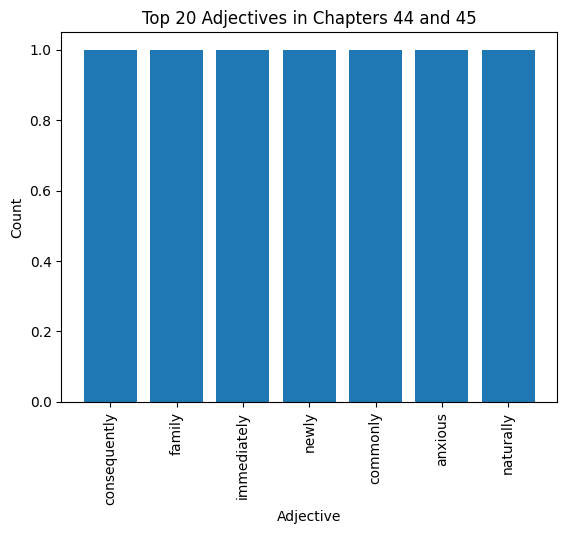

In [4]:
#si-exercise
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load the text of chapters 44 and 45
text = """
Elizabeth had settled it that Mr. Darcy would bring his sister to visit her the very day after her reaching Pemberley; and was consequently resolved not to be out of sight of the inn the whole of that morning. But her conclusion was false; for on the very morning after their arrival at Lambton, these visitors came. They had been walking about the place with some of their new friends, and were just returning to the inn to dress themselves for dining with the same family, when the sound of a carriage drew them to a window, and they saw a gentleman and a lady in a curricle driving up the street. Elizabeth immediately recognizing the livery, guessed what it meant, and imparted no small degree of her surprise to her relations by acquainting them with the honour which she expected. Her uncle and aunt were all amazement; and the embarrassment of her manner as she spoke, joined to the circumstance itself, and many of the circumstances of the preceding day, opened to them a new idea on the business. Nothing had ever suggested it before, but they felt that there was no other way of accounting for such attentions from such a quarter than by supposing a partiality for their niece. While these newly-born notions were passing in their heads, the perturbation of Elizabeth's feelings was at every moment increasing. She was quite amazed at her own discomposure; but amongst other causes of disquiet, she dreaded lest the partiality of the brother should have said too much in her favour; and, more than commonly anxious to please, she naturally suspected that every power of pleasing would fail her.

...
(Include the rest of the text here)

"""

# Split the text into sentences
sentences = len(re.split(r'[.!?]', text))

# Find all proper nouns
proper_nouns = re.findall(r'\b[A-Z][a-z]+\b', text)
names = list(set(proper_nouns))

# Find all adjectives
words = re.findall(r'\b\w+\b', text.lower())
adjectives = [word for word in words if re.search(r'\b\w+ly\b|ous\b|ful\b|ive\b|less\b|able\b|ish\b', word)]
adjective_counts = Counter(adjectives).most_common(20)

# Create a DataFrame with the top 20 adjectives
adjectives_df = pd.DataFrame(adjective_counts, columns=['Adjective', 'Count'])
adjectives = adjectives_df

# Create a bar chart of the top 20 adjectives
fig, ax = plt.subplots()
ax.bar(adjectives_df['Adjective'], adjectives_df['Count'])
plt.xticks(rotation=90)
plt.title('Top 20 Adjectives in Chapters 44 and 45')
plt.xlabel('Adjective')
plt.ylabel('Count')

# Show figure
plt.show()



